In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


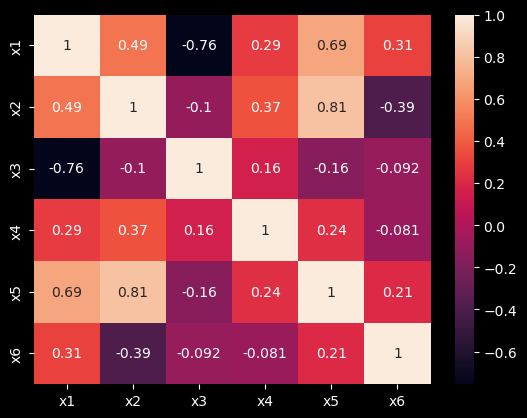

In [2]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=6, n_informative=4, n_redundant=2, n_classes=4, random_state=42)
feature_names = pd.Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6'])
X = pd.DataFrame(X, columns=feature_names)
y = pd.Series(y, name='y')

sns.heatmap(X.corr(), annot=True)
plt.show()

In [3]:
clf = RandomForestClassifier()
sfs = SequentialFeatureSelector(clf, tol=-0.001, direction='backward')
sfs.fit(X, y)
selected_features = feature_names[sfs.get_support()]
selected_features

Index(['x1', 'x3', 'x4', 'x5', 'x6'], dtype='object')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clfs = [RandomForestClassifier(), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier()]
y_preds = {}
y_probs = {}


for clf in clfs:
    print(f"\033[1m{clf}\033[0m")
    clf.fit(X_train, y_train)
    y_preds[clf.__class__.__name__] = clf.predict(X_test)
    y_probs[clf.__class__.__name__] = clf.predict_proba(X_test)


RandomForestClassifier()
KNeighborsClassifier()
GaussianNB()
DecisionTreeClassifier()


In [5]:
for clf in clfs:
    print(f"\033[1m{clf.__class__.__name__}\033[0m")
    print(classification_report(y_test, y_preds[clf.__class__.__name__]))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_probs[clf.__class__.__name__], multi_class='ovr')}")

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.86      0.75      0.81        85
           1       0.65      0.73      0.69        67
           2       0.73      0.83      0.78        86
           3       0.80      0.73      0.76        92

    accuracy                           0.76       330
   macro avg       0.76      0.76      0.76       330
weighted avg       0.77      0.76      0.76       330

ROC AUC Score: 0.9330815230728221
KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        85
           1       0.73      0.72      0.72        67
           2       0.80      0.81      0.80        86
           3       0.86      0.78      0.82        92

    accuracy                           0.79       330
   macro avg       0.79      0.79      0.79       330
weighted avg       0.79      0.79      0.79       330

ROC AUC Score: 0.9258039518249324
GaussianNB
       